In [53]:
import os
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio
import cv2

In [74]:
fp = '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/'
photo_files = [i.name for i in os.scandir(fp)]
photo_path = [fp+i for i in photo_files]
print('Number of files found = {}'.format(len(photo_path)))

Number of files found = 18


In [75]:
photo_path

['/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_1207.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-07-2021_2255.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_0359.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-07-2021_2356.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_0158.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_1106.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_0702.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_1611.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_1005.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_0803.png',
 '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-08-2021_0601.png',

## Browse files

In [7]:
def browse_files(i,return_data=False):
    photo_data = imageio.imread(photo_path[i])
    plt.figure(figsize=(15,15))
    plt.imshow(photo_data)
    if return_data:return photo_data

In [19]:
browse_files(4)

## Low value filter

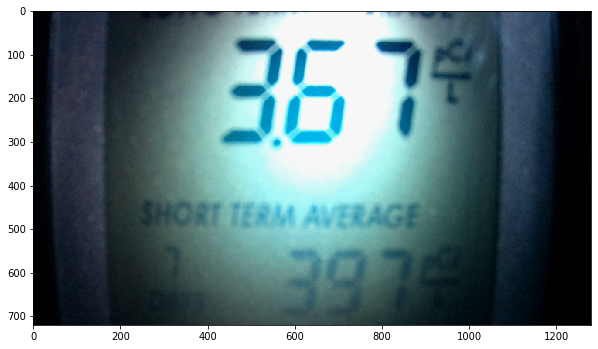

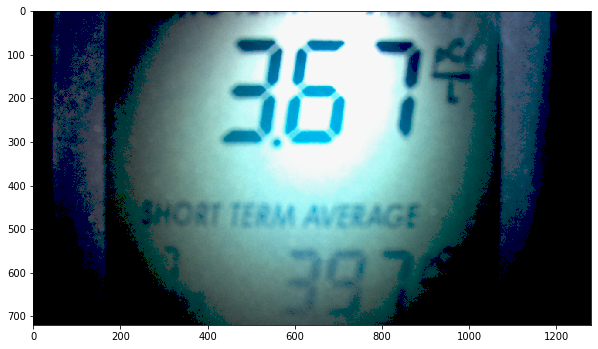

In [9]:
# low value filter
photo_data = imageio.imread(photo_path[2])
low_value_filter = photo_data < 50
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

## Position Scraper

In [15]:
def scope(position,fp,return_data = False,show = True):
    photo_data = imageio.imread(fp)
    photo_data[position['trow']:position['brow'], position['lcol']:position['rcol'],1]=100
    if show:
        plt.figure(figsize=(10,10))
        plt.imshow(photo_data)
    if return_data: return photo_data
def cutout(position,fp,return_data = False,show=True):
    photo_data = imageio.imread(fp)
    photo_data = photo_data[position['trow']:position['brow'], position['lcol']:position['rcol']]
    if show:
        plt.figure(figsize=(10,10))
        plt.imshow(photo_data)
    if return_data: return photo_data

### Top Row Positions

In [16]:
long_term0 = {'trow':50,'brow':320,'lcol':400,'rcol':580}
long_term1 = {'trow':50,'brow':320,'lcol':560,'rcol':740}
long_term2 = {'trow':50,'brow':320,'lcol':770,'rcol':950


In [52]:
scope(long_term2,photo_path[0])

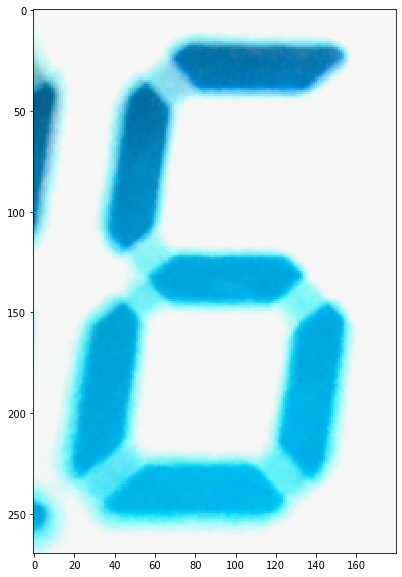

In [51]:
cutout(long_term1,photo_path[2])

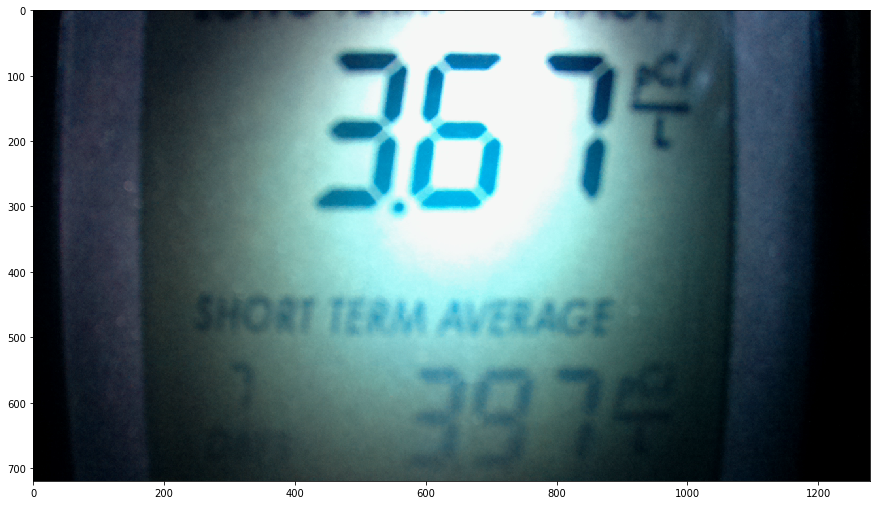

In [14]:
browse_files(2)

### short term days position

In [23]:
short_term = {'trow':530,'brow':620,'lcol':280,'rcol':360}

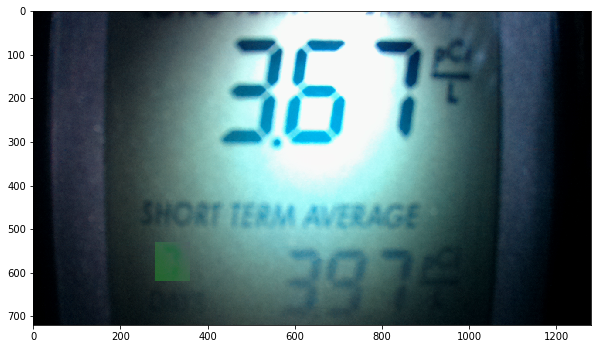

In [46]:
scope(short_term,photo_path[6])

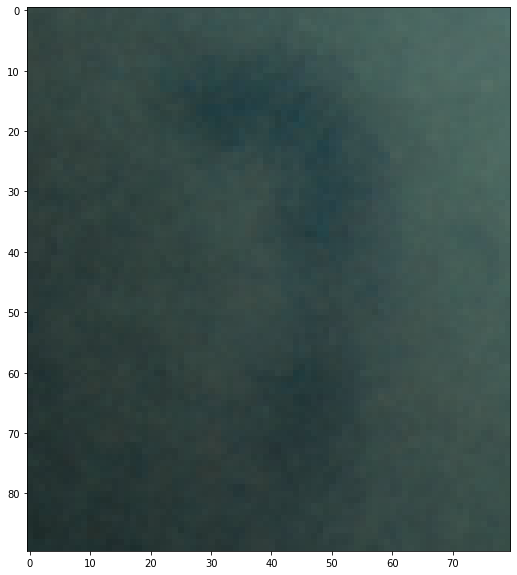

In [34]:
day_avg = cutout(short_term,photo_path[2],return_data = True)

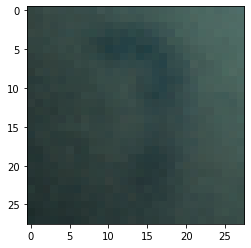

In [35]:
day_avg = cv2.resize(day_avg,(28,28))
plt.imshow(day_avg)

In [41]:
def low_value_mask(position,fp,cutoff = 70,return_data = False):
    photo_data = cutout(position,fp,return_data=True,show=False)
    photo_data = cv2.resize(photo_data,(28,28))
    mask   = photo_data[:, :,1] > cutoff
    photo_data[mask] = 100
    mask   = photo_data[:, :,1] > cutoff+30
    photo_data[mask] = 255
    
    plt.figure(figsize=(15,15))
    plt.imshow(photo_data)
    if return_data: return photo_data

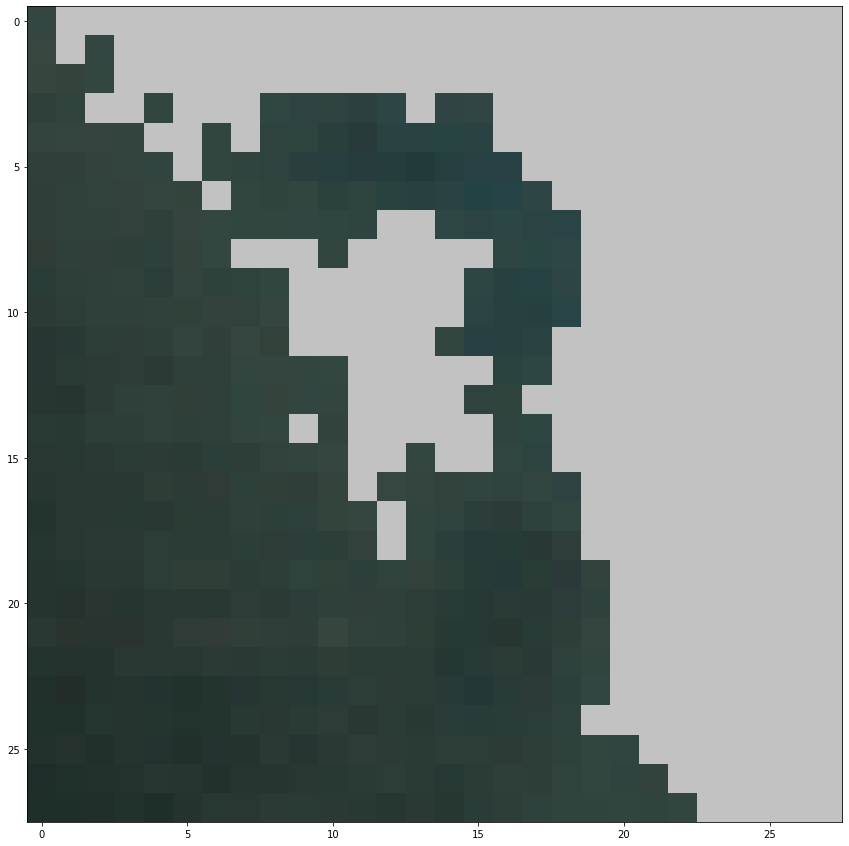

In [48]:
low_value_mask(short_term,photo_path[7])

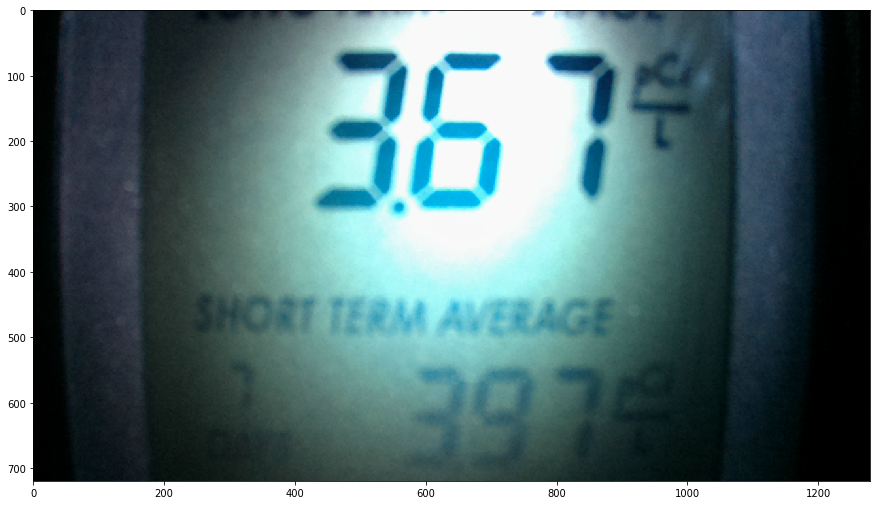

In [49]:
browse_files(7)

### short term rate

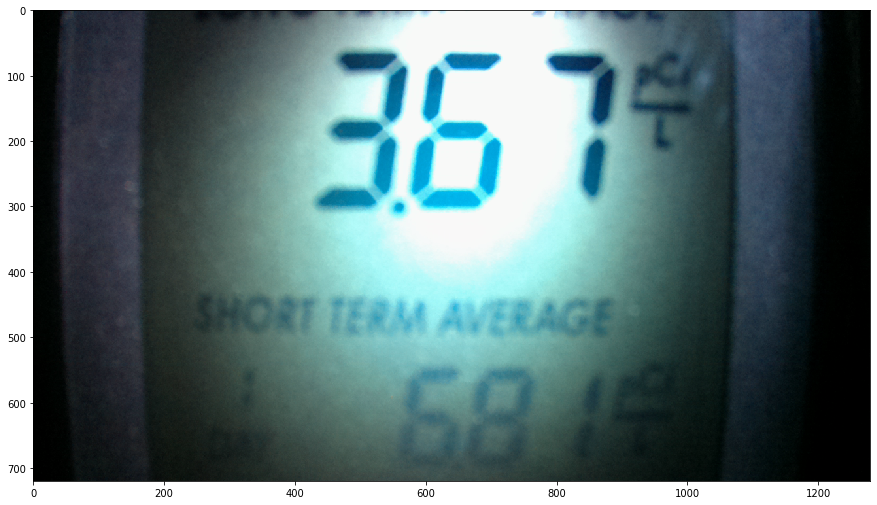

In [311]:
browse_files(4)

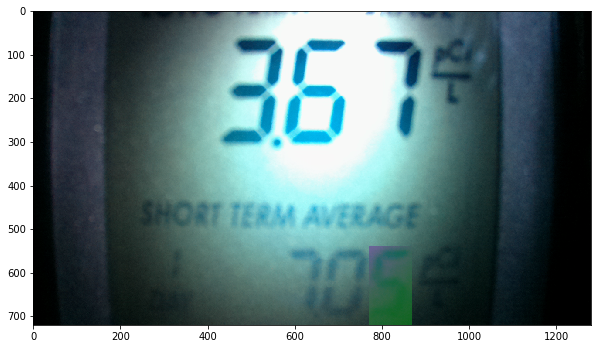

In [26]:
short_term_0 = {'trow':540,'brow':790,'lcol':560,'rcol':660}
short_term_1 = {'trow':540,'brow':790,'lcol':670,'rcol':770}
short_term_2 = {'trow':540,'brow':790,'lcol':770,'rcol':870}
scope(short_term_2,photo_path[1])

(180, 100, 4)

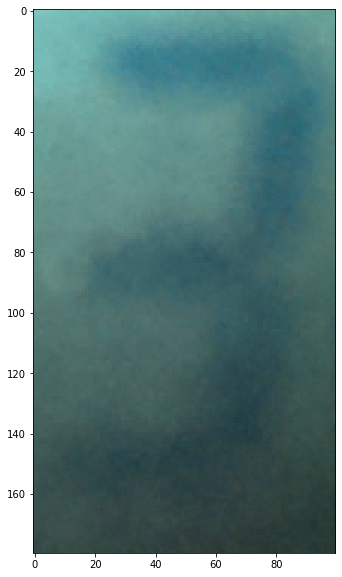

In [28]:
photo_data = cutout(short_term_1,photo_path[4],return_data = True)
photo_data.shape

In [29]:
img = cv2.resize(photo_data, (28, 28))

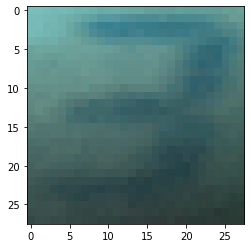

In [31]:
plt.imshow(img)

In [71]:
imageio.imwrite('test.png',photo_data)

In [68]:
photo_data

AttributeError: 'Array' object has no attribute 'save'

In [66]:
help(photo_data.tofile)

Help on built-in function tofile:

tofile(...) method of imageio.core.util.Array instance
    a.tofile(fid, sep="", format="%s")
    
    Write array to a file as text or binary (default).
    
    Data is always written in 'C' order, independent of the order of `a`.
    The data produced by this method can be recovered using the function
    fromfile().
    
    Parameters
    ----------
    fid : file or str or Path
        An open file object, or a string containing a filename.
    
        .. versionchanged:: 1.17.0
            `pathlib.Path` objects are now accepted.
    
    sep : str
        Separator between array items for text output.
        If "" (empty), a binary file is written, equivalent to
        ``file.write(a.tobytes())``.
    format : str
        Format string for text file output.
        Each entry in the array is formatted to text by first converting
        it to the closest Python type, and then using "format" % item.
    
    Notes
    -----
    This is a con